In [30]:
Traffic Sign Detaction

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [32]:
np.random.seed(0)

In [33]:
with open('/content/drive/MyDrive/Projects/traffic-signs-data/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('/content/drive/MyDrive/Projects/traffic-signs-data/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('/content/drive/MyDrive/Projects/traffic-signs-data/test.p', 'rb') as f:
  test_data = pickle.load(f)
 
print(type(train_data))

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [34]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(39209, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [35]:
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

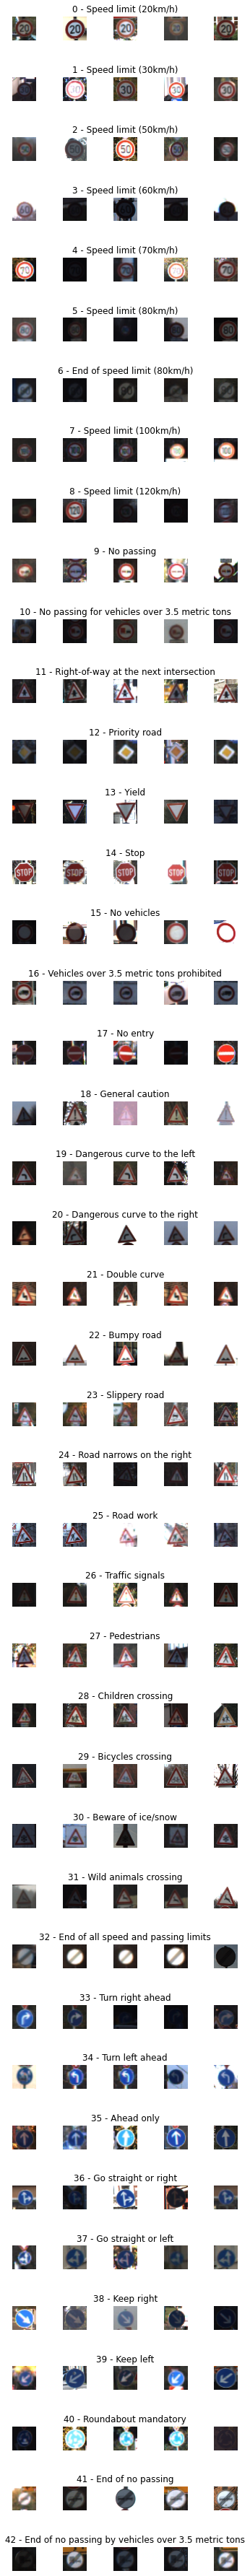

In [36]:
data = pd.read_csv('/content/drive/MyDrive/Projects/traffic-signs-data/signnames.csv')
  
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
      for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])
          num_of_samples.append(len(x_selected))

[210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]


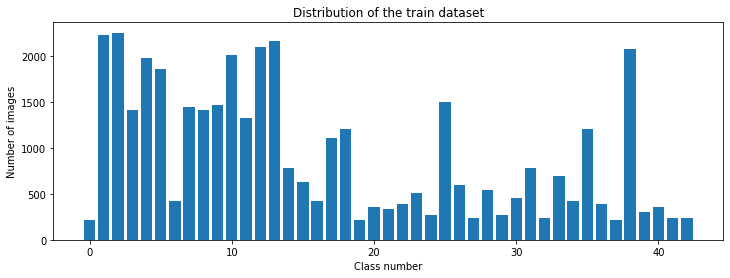

In [37]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
1


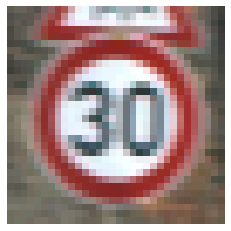

In [38]:
import cv2
 
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


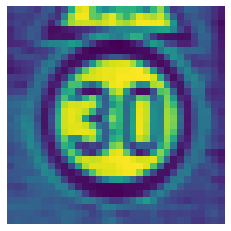

In [39]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)


(32, 32)


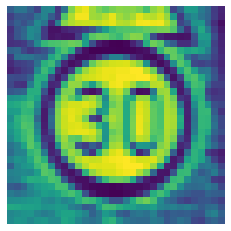

In [40]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [41]:
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))

(39209, 32, 32)


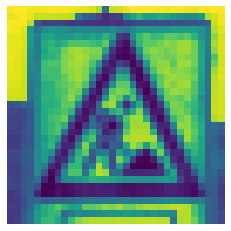

In [42]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [43]:
X_train = X_train.reshape(39209, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [44]:
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
 
datagen.fit(X_train)

(15, 32, 32, 1)


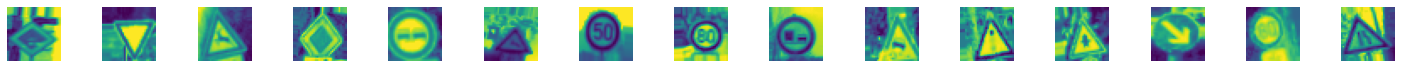

In [45]:
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)

In [46]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [47]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [48]:
model = modified_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 480)               0

In [55]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=50),
                            
                            epochs=10,
                            validation_data=(X_val, y_val), shuffle = 1)

Epoch 1/10
785/785 [==============================] - 15s 19ms/step - loss: 0.3029 - accuracy: 0.9065 - val_loss: 0.0576 - val_accuracy: 0.9782
Epoch 2/10
785/785 [==============================] - 15s 19ms/step - loss: 0.2218 - accuracy: 0.9300 - val_loss: 0.0238 - val_accuracy: 0.9925
Epoch 3/10
785/785 [==============================] - 15s 19ms/step - loss: 0.1861 - accuracy: 0.9422 - val_loss: 0.0179 - val_accuracy: 0.9939
Epoch 4/10
785/785 [==============================] - 15s 19ms/step - loss: 0.1647 - accuracy: 0.9477 - val_loss: 0.0226 - val_accuracy: 0.9914
Epoch 5/10
785/785 [==============================] - 15s 19ms/step - loss: 0.1365 - accuracy: 0.9579 - val_loss: 0.0302 - val_accuracy: 0.9893
Epoch 6/10
785/785 [==============================] - 15s 19ms/step - loss: 0.1269 - accuracy: 0.9608 - val_loss: 0.0114 - val_accuracy: 0.9957
Epoch 7/10
785/785 [==============================] - 15s 19ms/step - loss: 0.1154 - accuracy: 0.9640 - val_loss: 0.0193 - val_accuracy:

Text(0.5, 0, 'epoch')

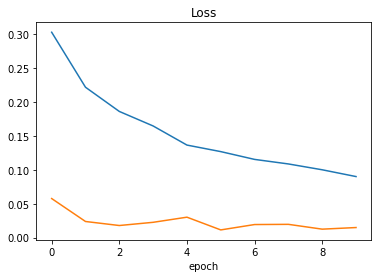

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

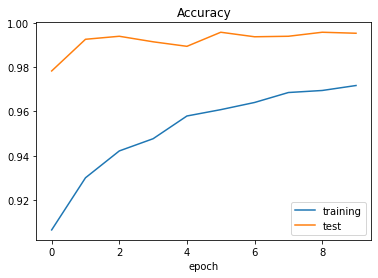

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [58]:
score = model.evaluate(X_test, y_test, verbose = 0)

print('Test score:', score[0])
print('Test Accuracy:', score[1])

Test score: 0.14772850275039673
Test Accuracy: 0.9635787606239319


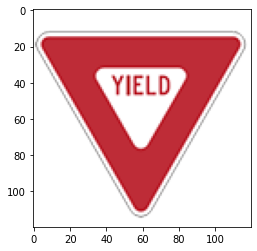

In [74]:
#predict internet number

import requests
from PIL import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/d/d2/US_DOT_Signs-Yield.png'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


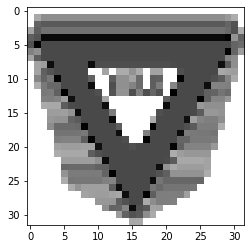

In [75]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [76]:
#Reshape reshape
img = img.reshape(1, 32, 32, 1)

In [77]:
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [13]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
